In [3]:
using Pkg
Pkg.instantiate()
Pkg.add("MCMCChains")
using TAMode
using Plots
using StaticArrays
using LinearAlgebra
using Statistics

  Resolving package versions...
   Updating `~/TAMode.jl/Project.toml`
 [no changes]
   Updating `~/TAMode.jl/Manifest.toml`
 [no changes]


In [4]:
tpsA549 = @SVector Float64[60, 240];
gasA549 = @SVector Float64[64, 16, 4, 1, 0.25, 0];
pYA549 = @SMatrix [10.8 8.3; 7.4 7.1; 7.1 7.7; 4.6 8.2; 6.1 7.2; 7.5 7.5];
totA549 = @SMatrix [3443.1 3219.7; 3143.4 3353.8; 3018.9 3611.8; 2608.9 3448.2; 2690.2 3168.1; 2672.0 2672.0];
surfA549 = @SMatrix [0.206 0.239; 0.274 0.316; 0.281 0.251; 0.220 0.302; 0.256 0.281; 0.257 0.337];

In [5]:
using MCMCChains
chn = read("chain-file-new5_19.jls", Chains);
summarize(chn)

Summary Statistics
     parameters     mean     std  naive_se    mcse       ess   r_hat
  ─────────────  ───────  ──────  ────────  ──────  ────────  ──────
        AXLexpr   1.6615  1.9516    0.1234  0.0417  170.2541  1.0017
         Ig2rev   1.4745  1.6345    0.1034  0.0281  325.3395  0.9964
         gasCur   0.1004  0.0101    0.0006  0.0001  453.9682  0.9982
    internalize   0.1003  0.0101    0.0006  0.0001  645.8023  0.9961
           kDeg   0.0100  0.0011    0.0001  0.0001  380.5343  0.9962
           kRec   0.1003  0.0097    0.0006  0.0007  462.4738  0.9988
  pYinternalize   1.0046  0.0956    0.0060  0.0071  398.9532  0.9992
          scale   1.3967  1.4748    0.0933  0.0795  338.6355  0.9976
      scaleSurf   1.5990  2.6043    0.1647  0.0397  302.9257  0.9967
          sortF   0.0937  0.0781    0.0049  0.0017  517.8043  0.9962
        sqResid  36.8803  7.7362    0.4893  0.0682  415.7422  0.9970
           xFwd   0.0842  0.1037    0.0066  0.0022  289.4505  0.9980


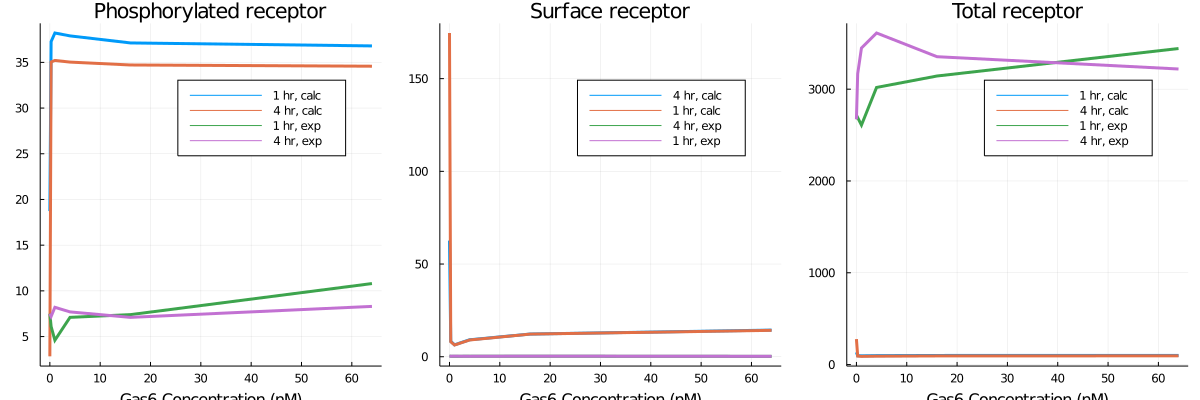

In [7]:
############## NEW FITTING
x = get(chn, [:internalize, :pYinternalize, :sortF, :kRec, :kDeg, :xFwd, :gasCur, :AXLexpr])
samp_params = hcat(x.internalize, x.pYinternalize, x.sortF, x.kRec, x.kDeg, x.xFwd, x.gasCur, x.AXLexpr)

Ig2rev = get(chn, :Ig2rev)[1];
scale = get(chn, :scale)[1];

scaleSurf = get(chn, :scaleSurf)[1];
pY = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
tot = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
surf = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));

for iter = 1:size(samp_params, 1)
    params = vcat(samp_params[iter, :], zeros(2), Ig2rev[iter], ones(4))
    pY[iter, :, :], tot[iter, :, :], surf[iter, :, :] = TAMode.dataModelCalc(tpsA549, gasA549, params, scale[iter], scaleSurf[iter])
end 

medpY = Statistics.median(pY, dims = 1);
medtot = Statistics.median(tot, dims = 1);
medsurf = Statistics.median(surf, dims = 1);
stdsurf = Statistics.std(surf, dims = 1);
meanpY = Statistics.mean(pY, dims = 1);
meantot = Statistics.mean(tot, dims = 1);
meansurf = Statistics.mean(surf, dims = 1);

tp1_calcmean = hcat(transpose(meanpY[:,1,:]), transpose(meansurf[:,1,:]), transpose(meantot[:,1,:]));
tp2_calcmean = hcat(transpose(meanpY[:,2,:]), transpose(meansurf[:,2,:]), transpose(meantot[:,2,:]));
tp1_calcmed = hcat(transpose(medpY[:,1,:]), transpose(medsurf[:,1,:]), transpose(medtot[:,1,:]));
tp2_calcmed = hcat(transpose(medpY[:,2,:]), transpose(medsurf[:,2,:]), transpose(medtot[:,2,:]));
tp1_exp = hcat(pYA549[:,1], surfA549[:,1], totA549[:,1]);
tp2_exp = hcat(pYA549[:,2], surfA549[:,2], totA549[:,2]);

### meadian
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")

In [8]:
using MCMCChains
chn = read("chain-file2.jls", Chains);
summarize(chn)

Summary Statistics
     parameters     mean     std  naive_se    mcse       ess   r_hat
  ─────────────  ───────  ──────  ────────  ──────  ────────  ──────
        AXLexpr   1.7210  2.0424    0.1292  0.1258  218.5290  0.9966
         Ig2rev   1.4792  1.8447    0.1167  0.0795  261.6473  1.0019
         gasCur   0.0998  0.0097    0.0006  0.0001  373.0543  0.9962
    internalize   0.1013  0.0102    0.0006  0.0007  310.9932  0.9993
           kDeg   0.0101  0.0009    0.0001  0.0001  376.2970  0.9961
           kRec   0.1005  0.0108    0.0007  0.0007  582.1049  0.9979
  pYinternalize   1.0010  0.1052    0.0067  0.0030  397.8988  0.9967
          scale   2.0032  2.6946    0.1704  0.1036  134.7807  1.0096
      scaleSurf   1.7003  2.1861    0.1383  0.3949  238.4753  1.0203
          sortF   0.0857  0.0770    0.0049  0.0002  311.9824  1.0016
        sqResid  35.8969  8.4736    0.5359  0.1705  314.0227  0.9975
           xFwd   0.0848  0.0997    0.0063  0.0013  287.1508  1.0038


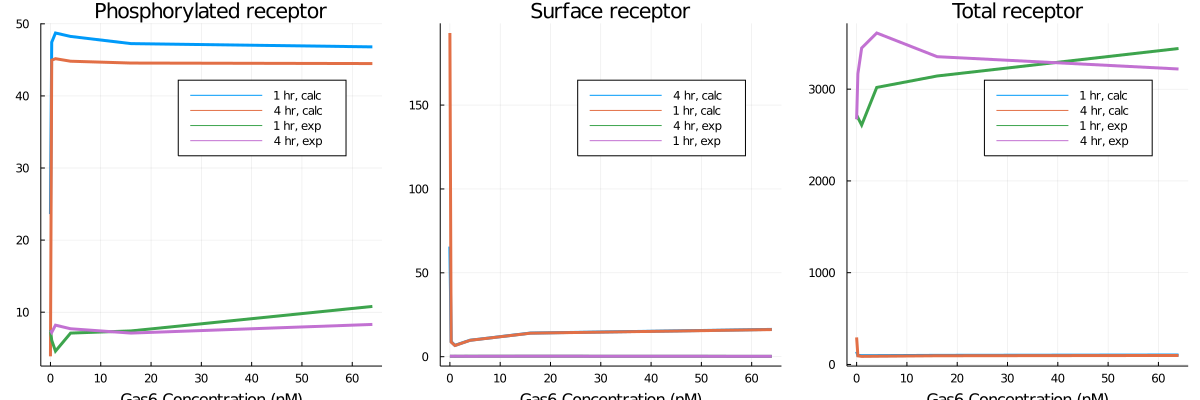

In [9]:
################# OLD FITTING
x = get(chn, [:internalize, :pYinternalize, :sortF, :kRec, :kDeg, :xFwd, :gasCur, :AXLexpr])
samp_params = hcat(x.internalize, x.pYinternalize, x.sortF, x.kRec, x.kDeg, x.xFwd, x.gasCur, x.AXLexpr)

Ig2rev = get(chn, :Ig2rev)[1];
scale = get(chn, :scale)[1];

scaleSurf = get(chn, :scaleSurf)[1];
pY = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
tot = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));
surf = Array{Float64}(undef, size(samp_params, 1), length(tpsA549), length(gasA549));

for iter = 1:size(samp_params, 1)
    params = vcat(samp_params[iter, :], zeros(2), Ig2rev[iter], ones(4))
    pY[iter, :, :], tot[iter, :, :], surf[iter, :, :] = TAMode.dataModelCalc(tpsA549, gasA549, params, scale[iter], scaleSurf[iter])
end 

medpY = Statistics.median(pY, dims = 1);
medtot = Statistics.median(tot, dims = 1);
medsurf = Statistics.median(surf, dims = 1);
stdsurf = Statistics.std(surf, dims = 1);
meanpY = Statistics.mean(pY, dims = 1);
meantot = Statistics.mean(tot, dims = 1);
meansurf = Statistics.mean(surf, dims = 1);

tp1_calcmean = hcat(transpose(meanpY[:,1,:]), transpose(meansurf[:,1,:]), transpose(meantot[:,1,:]));
tp2_calcmean = hcat(transpose(meanpY[:,2,:]), transpose(meansurf[:,2,:]), transpose(meantot[:,2,:]));
tp1_calcmed = hcat(transpose(medpY[:,1,:]), transpose(medsurf[:,1,:]), transpose(medtot[:,1,:]));
tp2_calcmed = hcat(transpose(medpY[:,2,:]), transpose(medsurf[:,2,:]), transpose(medtot[:,2,:]));
tp1_exp = hcat(pYA549[:,1], surfA549[:,1], totA549[:,1]);
tp2_exp = hcat(pYA549[:,2], surfA549[:,2], totA549[:,2]);

### meadian
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")

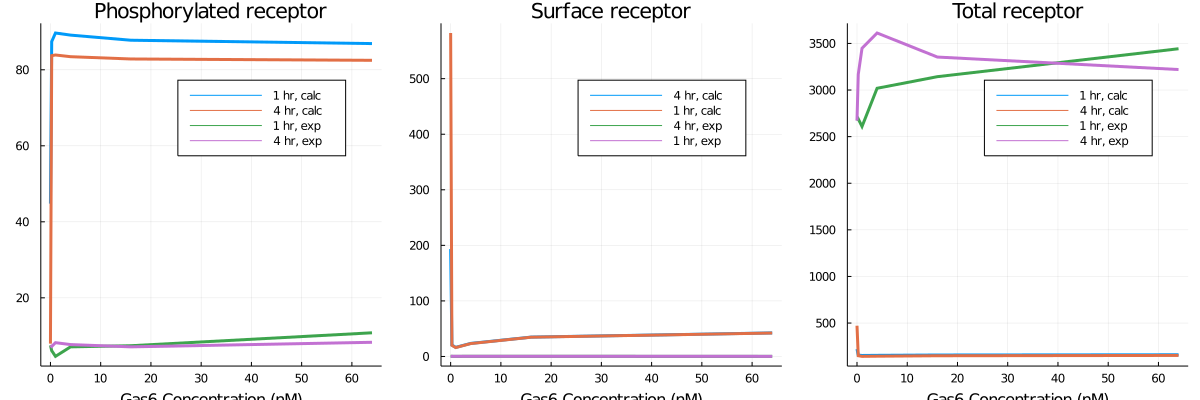

In [9]:
### mean
plot(gasA549, [tp1_calcmean, tp2_calcmean], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")

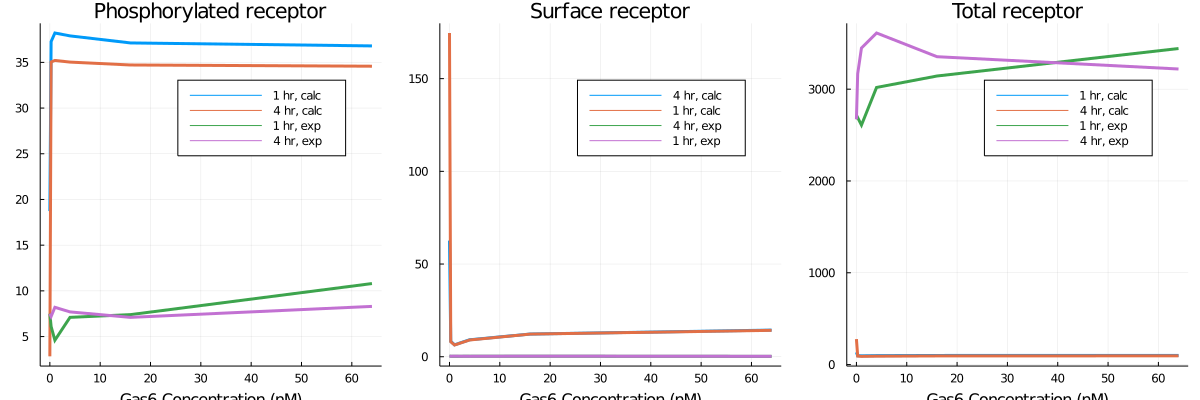

In [10]:
### meadian
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")